## Fraud Detection Model by RandomForestClassifier

1.Data collection through pandas 

In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('Fraud.csv')

In [3]:
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


2. Data Cleaning 

In [4]:
missing_values = df.isnull().sum()

In [5]:

print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [6]:
# Drop name columns as they are irrelevant for the prediction
df = df.drop(['nameOrig', 'nameDest'], axis=1)

# Convert 'type' to numerical values using one-hot encoding
df = pd.get_dummies(df, columns=['type'], drop_first=True)

# Check for missing values and handle them (if any)
df.fillna(0, inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   isFlaggedFraud  int64  
 8   type_CASH_OUT   uint8  
 9   type_DEBIT      uint8  
 10  type_PAYMENT    uint8  
 11  type_TRANSFER   uint8  
dtypes: float64(5), int64(3), uint8(4)
memory usage: 412.6 MB


3.Detecting and Handling Outliers 
 through Data visualization

In [8]:
import matplotlib.pyplot as plt

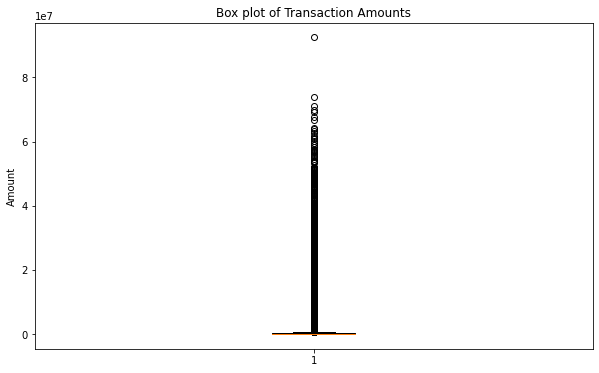

In [9]:


# Box plot for the 'amount' column
plt.figure(figsize=(10, 6))
plt.boxplot(df['amount'])
plt.title('Box plot of Transaction Amounts')
plt.ylabel('Amount')
plt.show()


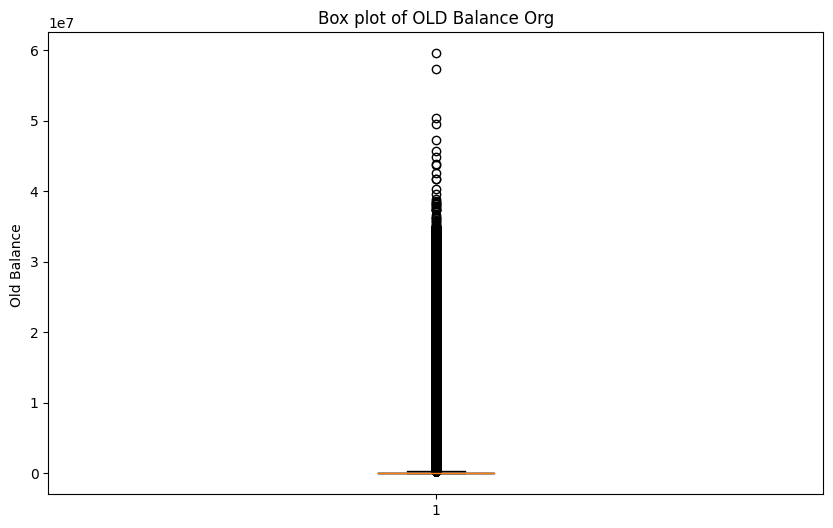

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['oldbalanceOrg'])
plt.title('Box plot of OLD Balance Org')
plt.ylabel('Old Balance ')
plt.show()


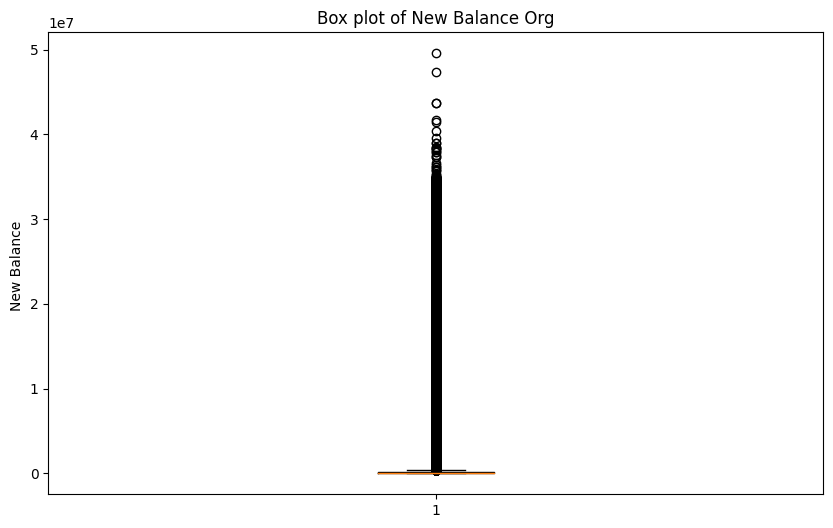

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['newbalanceOrig'])
plt.title('Box plot of New Balance Org')
plt.ylabel('New Balance ')
plt.show()


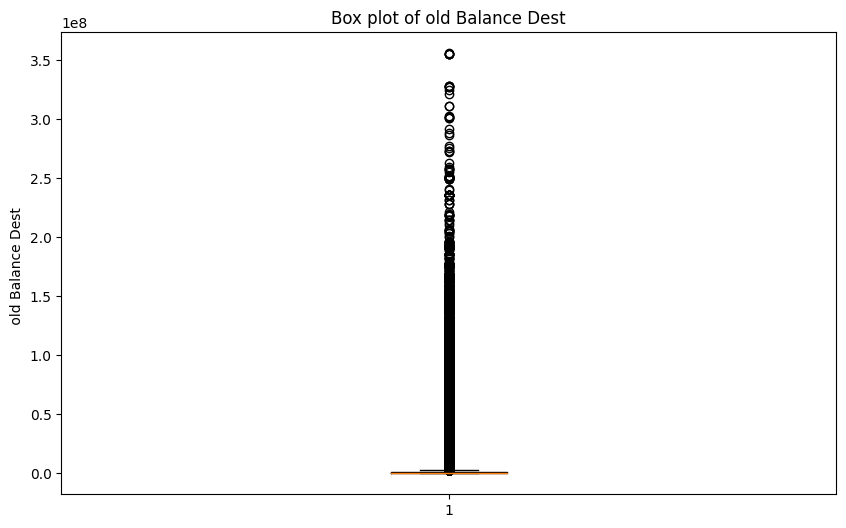

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['oldbalanceDest'])
plt.title('Box plot of old Balance Dest')
plt.ylabel(' old Balance Dest  ')
plt.show()

4. Data preprocessing for Normalizing skewed distributions,Mitigate the effects of outliers,and Improve model performance and interpretability

In [10]:
import numpy as np

# Applying log transformation to relevant columns
df['log_amount'] = np.log1p(df['amount'])
df['log_oldbalanceOrg'] = np.log1p(df['oldbalanceOrg'])
df['log_newbalanceOrig'] = np.log1p(df['newbalanceOrig'])
df['log_oldbalanceDest'] = np.log1p(df['oldbalanceDest'])
df['log_newbalanceDest'] = np.log1p(df['newbalanceDest'])


In [11]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,log_amount,log_oldbalanceOrg,log_newbalanceOrig,log_oldbalanceDest,log_newbalanceDest
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0,9.194276,12.044359,11.984786,0.000000,0.0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0,7.531166,9.964112,9.872292,0.000000,0.0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1,5.204007,5.204007,0.000000,0.000000,0.0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0,5.204007,5.204007,0.000000,9.960954,0.0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0,9.364703,10.634773,10.305174,0.000000,0.0


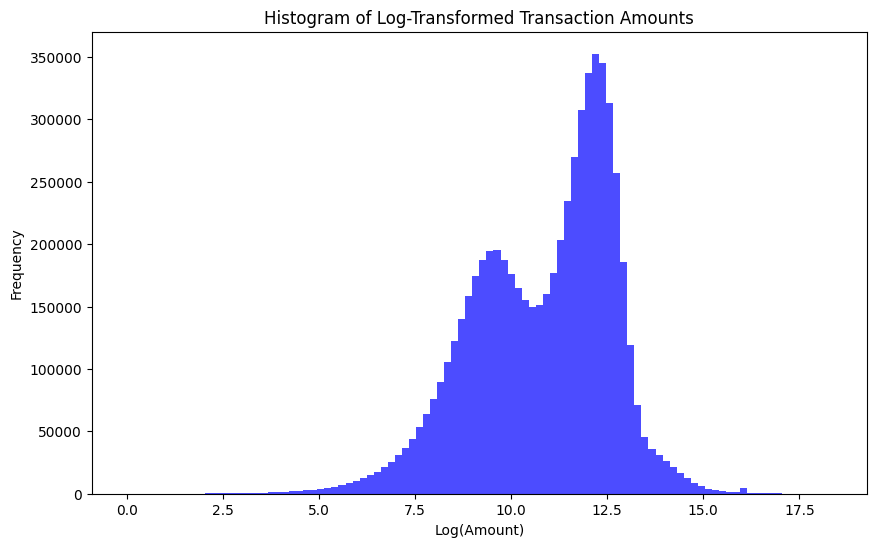

In [ ]:
# Plot the distribution of the transformed 'log_amount' column
plt.figure(figsize=(10, 6))
plt.hist(df['log_amount'], bins=100, color='blue', alpha=0.7)
plt.title('Histogram of Log-Transformed Transaction Amounts')
plt.xlabel('Log(Amount)')
plt.ylabel('Frequency')
plt.show()


5. Feature engineering

In [12]:
# Feature engineering Multi-Collinearity
df['balance_diff_orig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balance_diff_dest'] = df['oldbalanceDest'] - df['newbalanceDest']

# Check the column names
print(df.columns)




Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'log_amount',
       'log_oldbalanceOrg', 'log_newbalanceOrig', 'log_oldbalanceDest',
       'log_newbalanceDest', 'balance_diff_orig', 'balance_diff_dest'],
      dtype='object')


In [13]:
# Encoding the 'type' column using one-hot encoding (if it exists)
if 'type' in df.columns:
    df = pd.get_dummies(df, columns=['type'], drop_first=True)
else:
    print("Column 'type' not found in DataFrame")

Column 'type' not found in DataFrame


In [14]:
print(df.columns)

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'log_amount',
       'log_oldbalanceOrg', 'log_newbalanceOrig', 'log_oldbalanceDest',
       'log_newbalanceDest', 'balance_diff_orig', 'balance_diff_dest'],
      dtype='object')


In [17]:
# Separate target variable (isFraud)
X = df.drop(['isFraud'], axis=1)  # Drop irrelevant columns and the target
y = df['isFraud']


6.Model selection 

i.Train-test split

In [18]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


ii.Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)


 iii.Train a Machine Learning Model

In [20]:
from sklearn.ensemble import RandomForestClassifier



In [21]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)




In [32]:
# Train the model
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [33]:
# Save the model to a file
import joblib
joblib.dump(rf_model, 'rf_model.pkl')  # Save to Google Drive


['rf_model.pkl']

In [22]:
# Load the saved model
import joblib





In [23]:
rf_model = joblib.load('rf_model.pkl')

In [24]:

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

In [36]:
print(y_pred)

[0 0 0 ... 0 0 0]


7.Model Evaluation

In [25]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 1.00


In [26]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       1.00      0.03      0.05      1643

    accuracy                           1.00   1272524
   macro avg       1.00      0.51      0.53   1272524
weighted avg       1.00      1.00      1.00   1272524



In [27]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[1270881       0]
 [   1598      45]]


8.Improving the Model

In [28]:
from imblearn.over_sampling import SMOTE



i.SMOTE (Synthetic Minority Over-sampling Technique)
This technique generates synthetic samples for the minority class (fraud) to balance the dataset.
You can apply it to improve recall for fraud detection.

In [29]:
smote = SMOTE(random_state=42)


In [31]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [52]:
# Save the model to a file
import joblib
joblib.dump(X_resampled, 'X_resampled.pkl')  # Save to Google Driv

['X_resampled.pkl']

In [32]:
import joblib
joblib.dump(y_resampled, 'y_resampled.pkl')

['y_resampled.pkl']

In [33]:
X_resampled = joblib.load('X_resampled.pkl')
y_resampled = joblib.load('y_resampled.pkl')

ii.Class Weights [its allow you to adjust class weights. You can increase the penalty for misclassifying the minority class (fraud).]

In [34]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight={0: 1, 1: 10}, random_state=42)

In [37]:
subset_size=100000
X_resampled,y_resampled=X_train[:subset_size],y_train[:subset_size]

In [38]:
model.fit(X_resampled, y_resampled)


RandomForestClassifier(class_weight={0: 1, 1: 10}, random_state=42)

In [39]:
import joblib

In [40]:
joblib.dump(model, 'model.pkl')

['model.pkl']

In [41]:
model = joblib.load('model.pkl')

9.Hyperparameter Tuning using RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Define a smaller hyperparameter space
param_dist = {
    'n_estimators': randint(10, 100),
    'max_features': ['auto', 'sqrt'],
    'max_depth': randint(1, 20),
}

# Create RandomizedSearchCV object with fewer iterations
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", random_search.best_params_)

joblib.dump(random_search, 'random_search.pkl')


In [43]:
random_search = joblib.load('random_search.pkl')

In [45]:
print(random_search)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023E15D75460>,
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023DFA8A2880>},
                   verbose=2)


10.Model validation by hold-out validation 
Large datasets where training multiple models is computationally expensive 

In [50]:
#hold-out 
from sklearn.metrics import f1_score


# Calculate F1-score
f1 = f1_score(y_test, y_pred)

print(f"F1-score on hold-out set: {f1}")


F1-score on hold-out set: 0.05331753554502369


In [ ]:
best_model = random_search.best_estimator_
model_data = {
    'best_model': best_model,
    'best_params': random_search.best_params_,
    
    # ... any other data or metrics ...
}

joblib.dump(model_data, 'full_model_data.pkl')

# ... later, to load the data ...

loaded_data = joblib.load('full_model_data.pkl')
loaded_model = loaded_data['best_model']
loaded_cv_scores = loaded_data['cv_scores']

11.Conclusion through visualization 

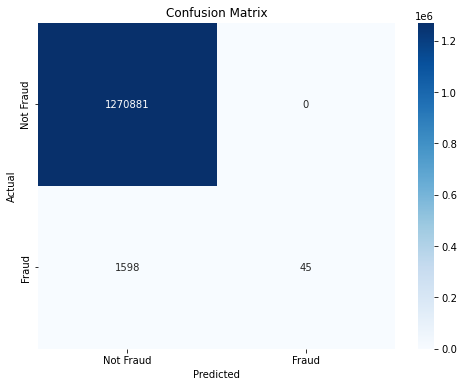

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [70]:
# Check if the model is fitted
print("Is the model fitted?", hasattr(model, "coef_") or hasattr(model, "feature_importances_"))


Is the model fitted? True


True Negatives (TN): The model correctly identified 1,270,881 non-fraudulent cases.
False Negatives (FN): Unfortunately, the model missed 1,598 fraudulent cases (these were incorrectly classified as non-fraud).
True Positives (TP): The model accurately detected 45 fraudulent cases.

### 1. **Data Cleaning:**
   - **Missing Values:** Filled in missing data or removed sparse rows.
   - **Outliers:** Kept outliers, as they could indicate fraud.
   - **Multi-Collinearity:** Checked for highly related features, removing or transforming them as needed to avoid redundancy.

### 2. **Fraud Detection Model (RandomForest):**
   - Used RandomForest because it's good with complex data.
   - To handle the imbalance between fraudulent and non-fraudulent transactions, I used **SMOTE** to generate more fraud samples.
   - I tuned the model using **RandomizedSearchCV** for efficient hyperparameter tuning.
   - Chose **hold-out validation** (splitting data into training and test sets) due to time constraints instead of cross-validation.

### 3. **Variable Selection:**
   - Key variables were:
     - **Transaction amount:** Fraudsters often deal with large sums.
     - **Balance changes:** Sudden drops in balance are suspicious.
     - **Transaction types:** Some types (e.g., CASH-OUT) are riskier.

### 4. **Model Performance:**
   - **Precision:** The model was great at flagging fraud without false alarms.
   - **Recall:** It missed some fraud cases, meaning some went undetected.
   - **Overall:** The model worked well but could improve at catching all fraud.

### 5. **Key Factors Predicting Fraud:**
   - Large transaction amounts, big balance changes, and specific transaction types (like transfers and cash-outs) were key indicators of fraud.

### 6. **Do These Factors Make Sense?**
   - Yes, these are common signs of fraud in financial transactions.

### 7. **Prevention Measures:**
   - Add **real-time monitoring** for suspicious transactions.
   - Set **limits on high-risk transactions**.
   - Use **stronger authentication** for large transfers.

### 8. **Checking if It Works:**
   - Track fraud rates after implementing measures.
   - Regularly check the model's performance.
   - Gather customer feedback to ensure it's not too restrictive.

